In [28]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
import numpy as np


#Carga de bases de datos.
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
df2 = pd.read_csv('Datos_finales_arreglados_sin_undersampling_int.csv', encoding='utf-8')



In [29]:
print(df.shape)
print(df2.shape)

(100000, 17)
(90000, 17)


In [30]:
def run_classifier(clf, X, y, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

y = df2['Severity'].to_numpy()
X = df2.drop('Severity', axis=1).to_numpy()

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Gaussian Naive Bayes", GaussianNB())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))

classifiers = [c0, c1, c2, c3]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")

----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.104825492440391
Recall promedio: 0.10440298507462689
F1-score promedio: 0.10460585031546527
----------------


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.6080097087378642
Recall promedio: 0.17803837953091686
F1-score promedio: 0.2754260582737768
----------------


----------------
Resultados para clasificador:  Gaussian Naive Bayes
Precision promedio: 0.2422960725075529
Recall promedio: 0.1425017768301351
F1-score promedio: 0.17945849183262463
----------------




KeyboardInterrupt: 

# Implementacion test 3

In [36]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier #kNN
import numpy as np


#Carga de bases de datos.
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
df2 = pd.read_csv('Datos_finales_arreglados_sin_undersampling_int.csv', encoding='utf-8')


In [38]:
print(df.shape)
print(df2.shape)

(100000, 17)
(90000, 17)


In [39]:
df.head()

,Severity,Start_Lng,Temperature.C.,Wind_Chill.C.,Humidity...,Pressure.pa.,Visibility.km.,Wind_Speed.kmh.,Precipitation.pa.,Bump,Crossing,Give_Way,Junction,Railway,Stop,Traffic_Signal,Sunrise_Sunset
0,1,-88.01407,15.000000,15.000000,75,9.335070,16.09340,11.265380,0.000000,0,0,0,0,0,0,0,0
1,1,-71.20423,16.111111,16.111111,83,9.483194,6.43736,32.186800,0.019321,0,0,0,1,0,0,0,0
2,1,-73.58044,11.666667,11.666667,96,9.537936,12.87472,22.530760,0.006440,0,0,0,0,0,0,0,1
3,1,-122.30528,13.888889,13.888889,51,9.692501,16.09340,20.921420,0.000000,0,0,0,0,0,0,0,0
4,1,-84.61284,0.000000,-6.222222,85,9.634539,16.09340,27.841582,0.000000,0,0,0,0,0,0,1,1


In [46]:
atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.", 
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset"]

def run_classifier1(clf, X, y, Xt, yt, num_tests=1):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = X, Xt, y, yt

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
classifiers = [c1, c3]

y = df['Severity'].to_numpy()
X = df.drop('Severity', axis=1)
yt = df2['Severity'].to_numpy()
Xt = df2.drop('Severity', axis=1)

for i in range(0, len(atributos)):
    if (atributos[6] != atributos[i] and atributos[6] != atributos[0] and atributos[i] != atributos[0]
       and atributos[4] != atributos[i] and atributos[4] != atributos[0] and atributos[4] != atributos[6]
       and atributos[8] != atributos[i] and atributos[8] != atributos[0] and atributos[8] != atributos[4] 
       and atributos[8] != atributos[6] and atributos[7] != atributos[i] and atributos[7] != atributos[0]
       and atributos[7] != atributos[4] and atributos[7] != atributos[6] and atributos[7] != atributos[8]):
        print([atributos[0], atributos[6], atributos[4], atributos[8], atributos[7], atributos[i]])
        X1 = X[[atributos[0], atributos[6], atributos[4], atributos[8], atributos[7], atributos[i]]].to_numpy()
        Xt1 = Xt[[atributos[0], atributos[6], atributos[4], atributos[8], atributos[7], atributos[i]]].to_numpy()
        results = {}
        for name, clf in classifiers:
            metrics = run_classifier1(clf, X1, y, Xt1, yt)   # hay que implementarla en el bloque anterior.
            results[name] = metrics
            print("----------------")
            print("Resultados para clasificador: ", name) 
            print("Precision promedio:", np.array(metrics['precision']).mean())
            print("Recall promedio:", np.array(metrics['recall']).mean())
            print("F1-score promedio:", np.array(metrics['f1-score']).mean())
            print("----------------\n\n")

['Start_Lng', 'Junction', 'Pressure.pa.', 'Sunrise_Sunset', 'Traffic_Signal', 'Temperature.C.']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.20657334517719853
Recall promedio: 0.7195134962125254
F1-score promedio: 0.3209900047596383
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.24304358532381187
Recall promedio: 0.6318147871545929
F1-score promedio: 0.35104774889593643
----------------


['Start_Lng', 'Junction', 'Pressure.pa.', 'Sunrise_Sunset', 'Traffic_Signal', 'Wind_Chill.C.']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.20958496476115895
Recall promedio: 0.7138589565774032
F1-score promedio: 0.32403506223061646
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.24184715978749488
Recall promedio: 0.6313880294462819
F1-score promedio: 0.34973258871849416
----------------


['Start_Lng', 'Junction', 'Pressure.pa.', 'Sun

In [16]:
atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.", 
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset"]

def run_classifier1(clf, X, y, Xt, yt, num_tests=1):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = X, Xt, y, yt

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
classifiers = [c1, c3]

y = df['Severity'].to_numpy()
X = df.drop('Severity', axis=1)
yt = df2['Severity'].to_numpy()
Xt = df2.drop('Severity', axis=1)

for i in range(0, len(atributos)):
    if(atributos[0] != atributos[i]):
        print([atributos[0], atributos[i]])
        X1 = X[[atributos[0], atributos[i]]].to_numpy()
        Xt1 = Xt[[atributos[0], atributos[i]]].to_numpy()
        results = {}
        for name, clf in classifiers:
            metrics = run_classifier1(clf, X1, y, Xt1, yt)   # hay que implementarla en el bloque anterior.
            results[name] = metrics
            print("----------------")
            print("Resultados para clasificador: ", name) 
            print("Precision promedio:", np.array(metrics['precision']).mean())
            print("Recall promedio:", np.array(metrics['recall']).mean())
            print("F1-score promedio:", np.array(metrics['f1-score']).mean())
            print("----------------\n\n")

['Start_Lng', 'Temperature.C.']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.2131473443557205
Recall promedio: 0.6863330843913368
F1-score promedio: 0.32527683672953434
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.23672088377970732
Recall promedio: 0.6195455030406487
F1-score promedio: 0.34255545068428506
----------------


['Start_Lng', 'Wind_Chill.C.']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.2127743983073261
Recall promedio: 0.6866531526725701
F1-score promedio: 0.32487822114535225
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.23859170079847752
Recall promedio: 0.6152779259575376
F1-score promedio: 0.3438468876699261
----------------


['Start_Lng', 'Humidity...']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.21165777911929437
Recall promedio: 0.6733169742878481
F1-score 

In [30]:
atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.", 
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset"]

def run_classifier1(clf, X, y, Xt, yt, num_tests=1):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = X, Xt, y, yt

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
classifiers = [c1, c3]

y = df['Severity'].to_numpy()
X = df.drop('Severity', axis=1)
yt = df2['Severity'].to_numpy()
Xt = df2.drop('Severity', axis=1)

for i in range(0, len(atributos)):
    if(atributos[0] != atributos[i] and atributos[i] != atributos[4]):
        print([atributos[0], atributos[4], atributos[i]]
        X1 = X[[atributos[0], atributos[4], atributos[i]]].to_numpy()
        Xt1 = Xt[[atributos[0], atributos[4], atributos[i]]].to_numpy()
        results = {}
        for name, clf in classifiers:
            metrics = run_classifier1(clf, X1, y, Xt1, yt)   # hay que implementarla en el bloque anterior.
            results[name] = metrics
            print("----------------")
            print("Resultados para clasificador: ", name) 
            print("Precision promedio:", np.array(metrics['precision']).mean())
            print("Recall promedio:", np.array(metrics['recall']).mean())
            print("F1-score promedio:", np.array(metrics['f1-score']).mean())
            print("----------------\n\n")

['Start_Lng', 'Pressure.pa.', 'Temperature.C.']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.20958496476115895
Recall promedio: 0.7138589565774032
F1-score promedio: 0.32403506223061646
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.21608158462443616
Recall promedio: 0.5877520537714712
F1-score promedio: 0.31599174027761845
----------------


['Start_Lng', 'Pressure.pa.', 'Wind_Chill.C.']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.20958496476115895
Recall promedio: 0.7138589565774032
F1-score promedio: 0.32403506223061646
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.21608158462443616
Recall promedio: 0.5877520537714712
F1-score promedio: 0.31599174027761845
----------------


['Start_Lng', 'Pressure.pa.', 'Humidity...']
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.209584964761

KeyboardInterrupt: 

In [47]:
atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.", 
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset"]

def run_classifier1(clf, X, y, Xt, yt, num_tests=1):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = X, Xt, y, yt

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
classifiers = [c1, c3]

y = df['Severity'].to_numpy()
X = df.drop('Severity', axis=1)
yt = df2['Severity'].to_numpy()
Xt = df2.drop('Severity', axis=1)

X1 = X[atributos].to_numpy()
Xt1 = Xt[atributos].to_numpy()
results = {}
for name, clf in classifiers:
    metrics = run_classifier1(clf, X1, y, Xt1, yt)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")

----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.20958496476115895
Recall promedio: 0.7138589565774032
F1-score promedio: 0.32403506223061646
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.21608158462443616
Recall promedio: 0.5877520537714712
F1-score promedio: 0.31599174027761845
----------------




# Implementacion test 1

In [47]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

random_state = 20

#Carga de bases de datos.
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
df2 = pd.read_csv('Datos_finales_arreglados_sin_undersampling_int.csv', encoding='utf-8')


In [48]:
print(df.shape)
print(df2.shape)

(100000, 17)
(90000, 17)


In [49]:
df.head()

,Severity,Start_Lng,Temperature.C.,Wind_Chill.C.,Humidity...,Pressure.pa.,Visibility.km.,Wind_Speed.kmh.,Precipitation.pa.,Bump,Crossing,Give_Way,Junction,Railway,Stop,Traffic_Signal,Sunrise_Sunset
0,1,-88.01407,15.000000,15.000000,75,9.335070,16.09340,11.265380,0.000000,0,0,0,0,0,0,0,0
1,1,-71.20423,16.111111,16.111111,83,9.483194,6.43736,32.186800,0.019321,0,0,0,1,0,0,0,0
2,1,-73.58044,11.666667,11.666667,96,9.537936,12.87472,22.530760,0.006440,0,0,0,0,0,0,0,1
3,1,-122.30528,13.888889,13.888889,51,9.692501,16.09340,20.921420,0.000000,0,0,0,0,0,0,0,0
4,1,-84.61284,0.000000,-6.222222,85,9.634539,16.09340,27.841582,0.000000,0,0,0,0,0,0,1,1


In [50]:
atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.", 
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset"]

y = df['Severity'].to_numpy()
X = df2.drop('Severity', axis=1)
yt = df2['Severity'].to_numpy()
Xt = df2.drop('Severity', axis=1)


X1 = X[atributos].dropna(axis=0, how='any', inplace=False).to_numpy()
Xt1 = Xt[atributos].to_numpy()

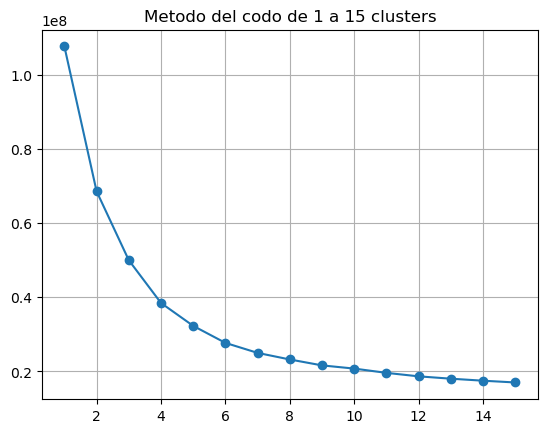

In [51]:
sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k,n_init='auto').fit(X1)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

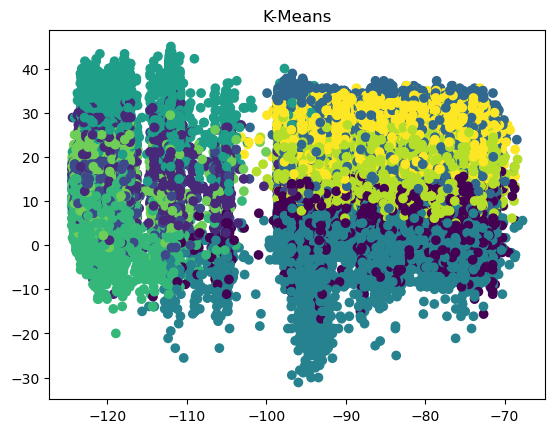

In [52]:
kmeans = KMeans(n_clusters=10, random_state=20,n_init='auto').fit(X1)
y_pred = kmeans.predict(X1)

plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

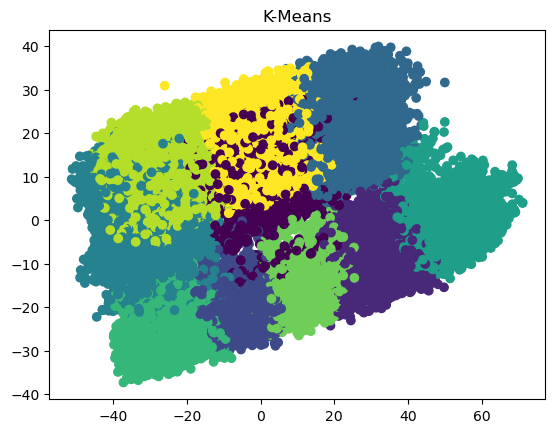

In [53]:
new_X = PCA(n_components=2, random_state=0).fit_transform(X1)
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

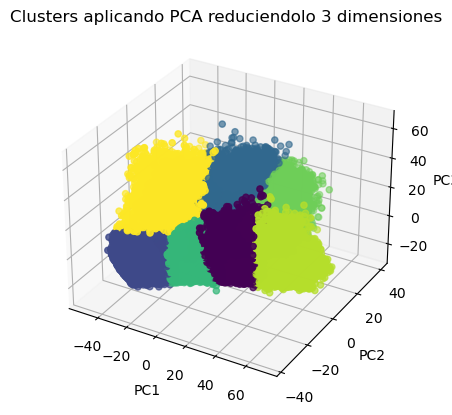

In [27]:
# Aplicar PCA
X = df[atributos]
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X1)

# Aplicar K-Means
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
kmeans.fit(X_pca)
labels = kmeans.labels_

# Graficar los clusters en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Clusters aplicando PCA reduciendolo 3 dimensiones')
plt.show()

# Nueva Pregunta 1

In [19]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

headers= ["Severity","Year","Start_Lng","Temperature.C.","Wind_Chill.C.","Humidity...","Pressure.pa.",
          "Visibility.km.","Wind_Speed.kmh.","Precipitation.pa.","Bump","Crossing","Give_Way",
          "Junction","Railway","Stop","Traffic_Signal","Sunrise_Sunset"]

#Carga de bases de datos
df = pd.read_csv('muestraAnos.csv', encoding='utf-8', header= None , names= headers)
df = df.drop_duplicates()
df_selected.reset_index(drop=True, inplace=True)

print(df.shape)
df.head()

NameError: name 'df_selected' is not defined

In [42]:
# Convertir la columna 'Year' a tipo datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Seleccionar características relevantes
df_selected = df[['Severity', 'Year']]

# Calcular la frecuencia de accidentes por año
yearly_counts = df_selected.groupby('Year')['Severity'].size()

# Reformatear los datos para el clustering
X = yearly_counts.values.reshape(-1, 1)

# Aplicar el algoritmo de clustering (K-means)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)

# Asignar las etiquetas de cluster a los datos
labels = kmeans.predict(X)
print(labels)
df_selected['Cluster'] = labels

# Calcular la frecuencia de accidentes por año y cluster
cluster_year_counts = df_selected.groupby(['Cluster', 'Year']).size().unstack()


[1 2 2 3 0 0 0 2]


D:\Users\kauer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: Length of values (8) does not match length of index (114086)

In [ ]:
plt.figure(figsize=(10, 6))
cluster_año.plot(marker='o')
plt.xlabel('Año')
plt.ylabel('Frecuencia de Accidentes')
plt.title('Patrones Estacionales por Cluster')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()